# BlackFriday-Sales-Analyse&Prediction

### Project Introduction

Black Friday is the day after American Thanksgiving, meaning the retailers often heavily promote their stores and markdown prices to entice shoppers to buy products both online and offline. Retailers have the freedom to set their Black Friday deals anyway they’d like to better entice purchases. So the major challenge for a Retail store or eCommerce business is to choose product price such that they get maximum profit at the end of the sales. Our project deals with determining the product prices based on the historical retail store sales data. After generating the predictions, our model will help the retail store to decide the price of the products to earn more profits.

### Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importing dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Descriptive analysis

In [3]:
# Preview training dataset
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Preview testing dataset
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# Training dataset dimensions - (rows, columns)
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [6]:
# Testing dataset dimensions - (rows, columns)
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [7]:
# Features data-type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


In [8]:
# Statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [9]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [10]:
# Checking the counts of unique values in "Age"
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [11]:
# Checking the counts of unique values in "Stay_In_Current_City_Years"
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' contains 69.67% null values so we can drop this feature.

The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.

### Exploratory Data Analysis

### Univariate Analysis

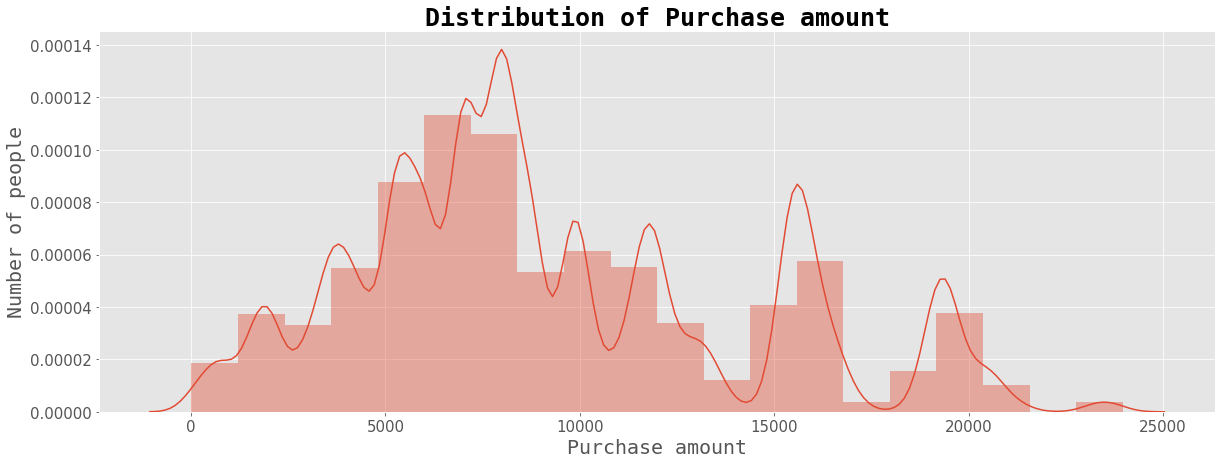

In [12]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

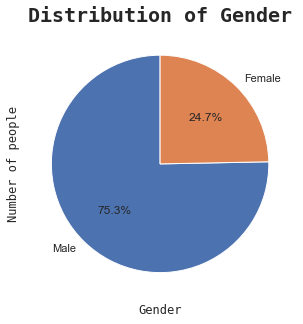

In [13]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()

#plt.style.use('seaborn-whitegrid')
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")
f, ax = plt.subplots(figsize=(5, 5))
labels = ['Male', 'Female']
plt.pie(gen, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 12})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 12})
plt.tick_params(labelsize = 10)
plt.show()

Approximately, 75% of the number of purchases are made by Male users and rest of the 25% is done by female users. This tells us the Male consumers are the major contributors to the number of sales for the retail store.

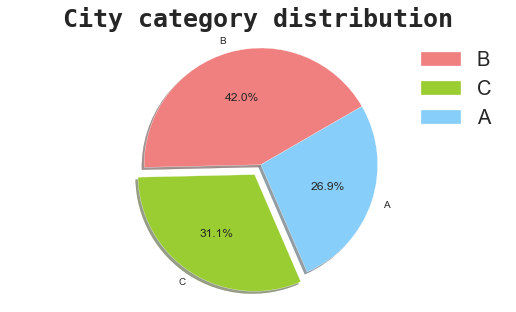

In [14]:
# Creating a pie chart for 'City Category'
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (9, 5))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.10, 0),colors=['lightcoral', 'yellowgreen', 'lightskyblue'], shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

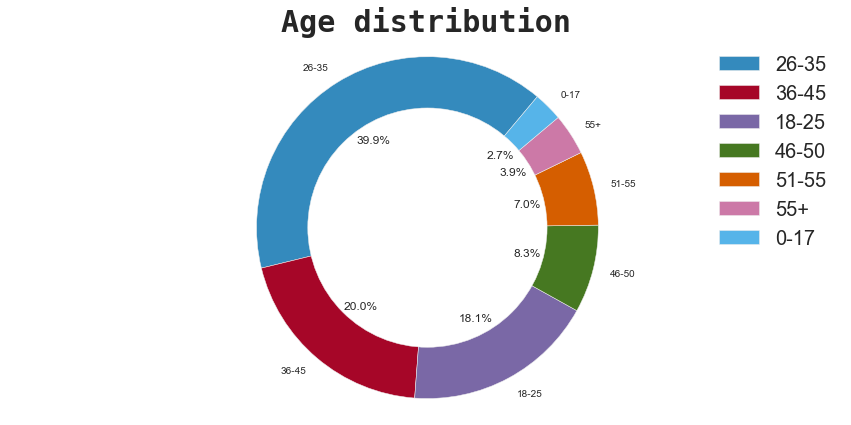

In [15]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (15, 7))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

The Majority of users are from age group of 26-35 Further.

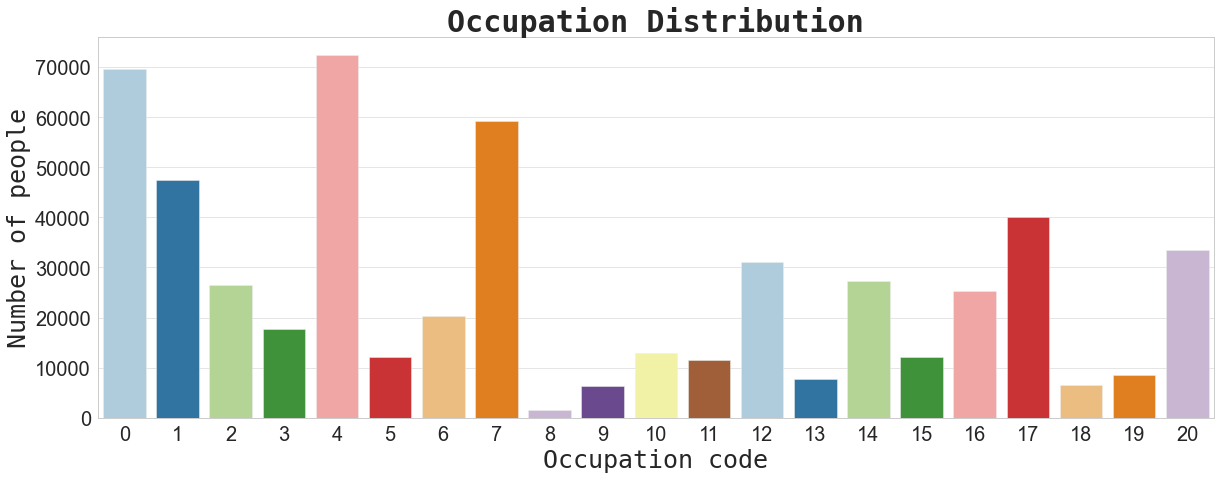

In [16]:
# Creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

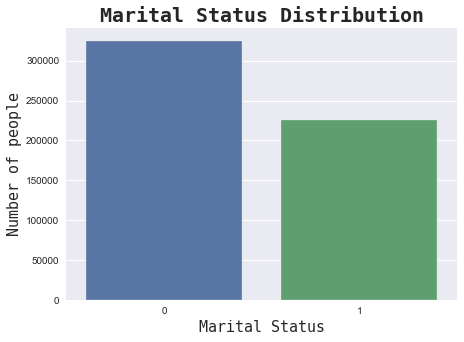

In [17]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

The Plot above is with value of 0 & 1, which doesn't make sense. Let us re plot with the same with proper legend.

In [18]:
#class handler to get the legend displayed in the plot
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        '''
        Function to display legend for a plot
        Input: legend, tuple string, placement of x and y descent, width and hight, font for the legend
        Output: retuns the text for legend        
        '''
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

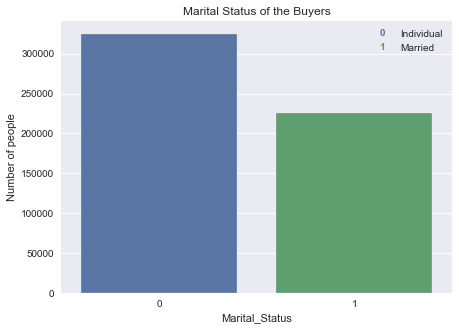

In [19]:
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
ax=sns.countplot(train.Marital_Status) 
#creating the mapping text for the values
handltext = ["0", "1"]
labels = ["Individual", "Married"]
#get the X axis tick labels
t = ax.get_xticklabels()
#map the x values as key and values
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
plt.title("Marital Status of the Buyers")
plt.ylabel('Number of people')
plt.show()

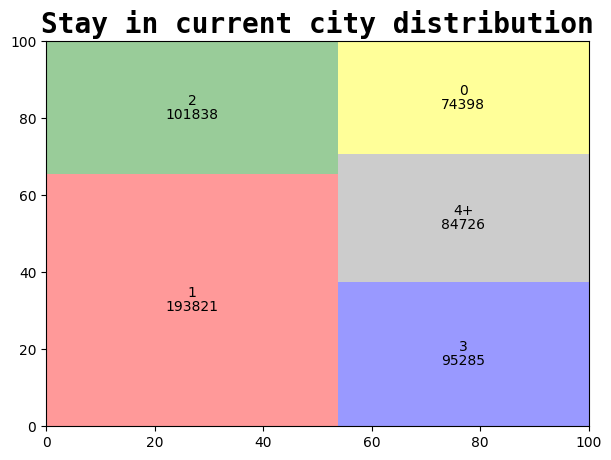

In [20]:
# Creating a Treemap for 'Stay_In_Current_City_Years'
stay = train['Stay_In_Current_City_Years'].value_counts()

import squarify
plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values, color=["red","green","blue", "grey","yellow"],alpha=.4)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

### Bivariate Analysis

In this case, I will try to answer the following questions

What all are the products, that have been purchased the most? Which product category has been sold the maximum? Men or Women, who are likely to spend more in Black Friday Sales? Married or Individuals, who spends more? Which age group has more interest in these type of sales?

##### Men or Women, who are likely to spend more in Black Friday Sales?

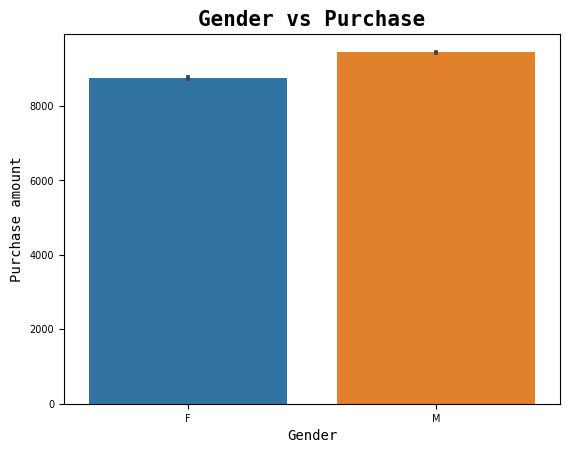

In [21]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('default')
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Gender vs Purchase', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

Bit disappointed as my guess was Women !! The plot show that men spent a lot in the black friday sales. But it might be in other way, as women purchased lot and made their spouse pay the bills. Let us deep dive more to understand on marital status of the buyers.

##### Observe purchase amount effect based on gender and their martital status.

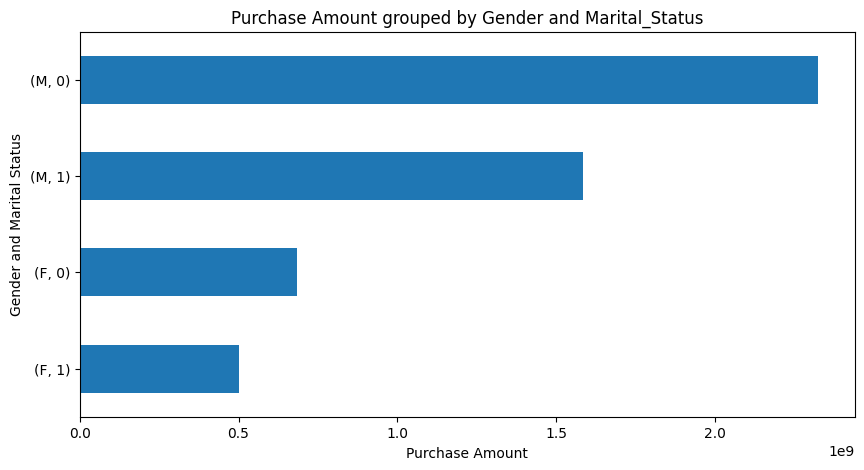

In [22]:
groupby=train.groupby(['Gender','Marital_Status']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh',color='#1f77b4')
plt.title('Purchase Amount grouped by Gender and Marital_Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Gender and Marital Status')
plt.style.use(('ggplot'))

the combination between Gender and Marital_Status for analysis, we came to know that Single Men spend the most during the Black Friday. It also tells that Men tend to spend less once they are married. It maybe because of the added responsibilities.

##### Observe purchase amount based on person age and marital status.

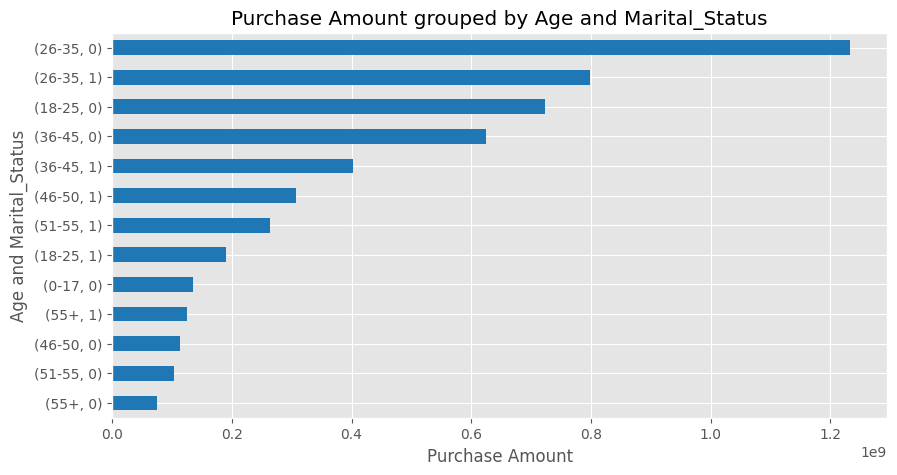

In [23]:
groupby=train.groupby(['Age','Marital_Status']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh',color='#1f77b4')
plt.title('Purchase Amount grouped by Age and Marital_Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Age and Marital_Status')
plt.style.use(('ggplot'))

We observe the consumers who belong to the age group 26-35 tend to spend the most. The effect of marriage remains the same, ie. the same age group spends less once they are married. Understandably, Teenagers and Elderly people spend the least.

##### Observe purchase amount based on person occupation.

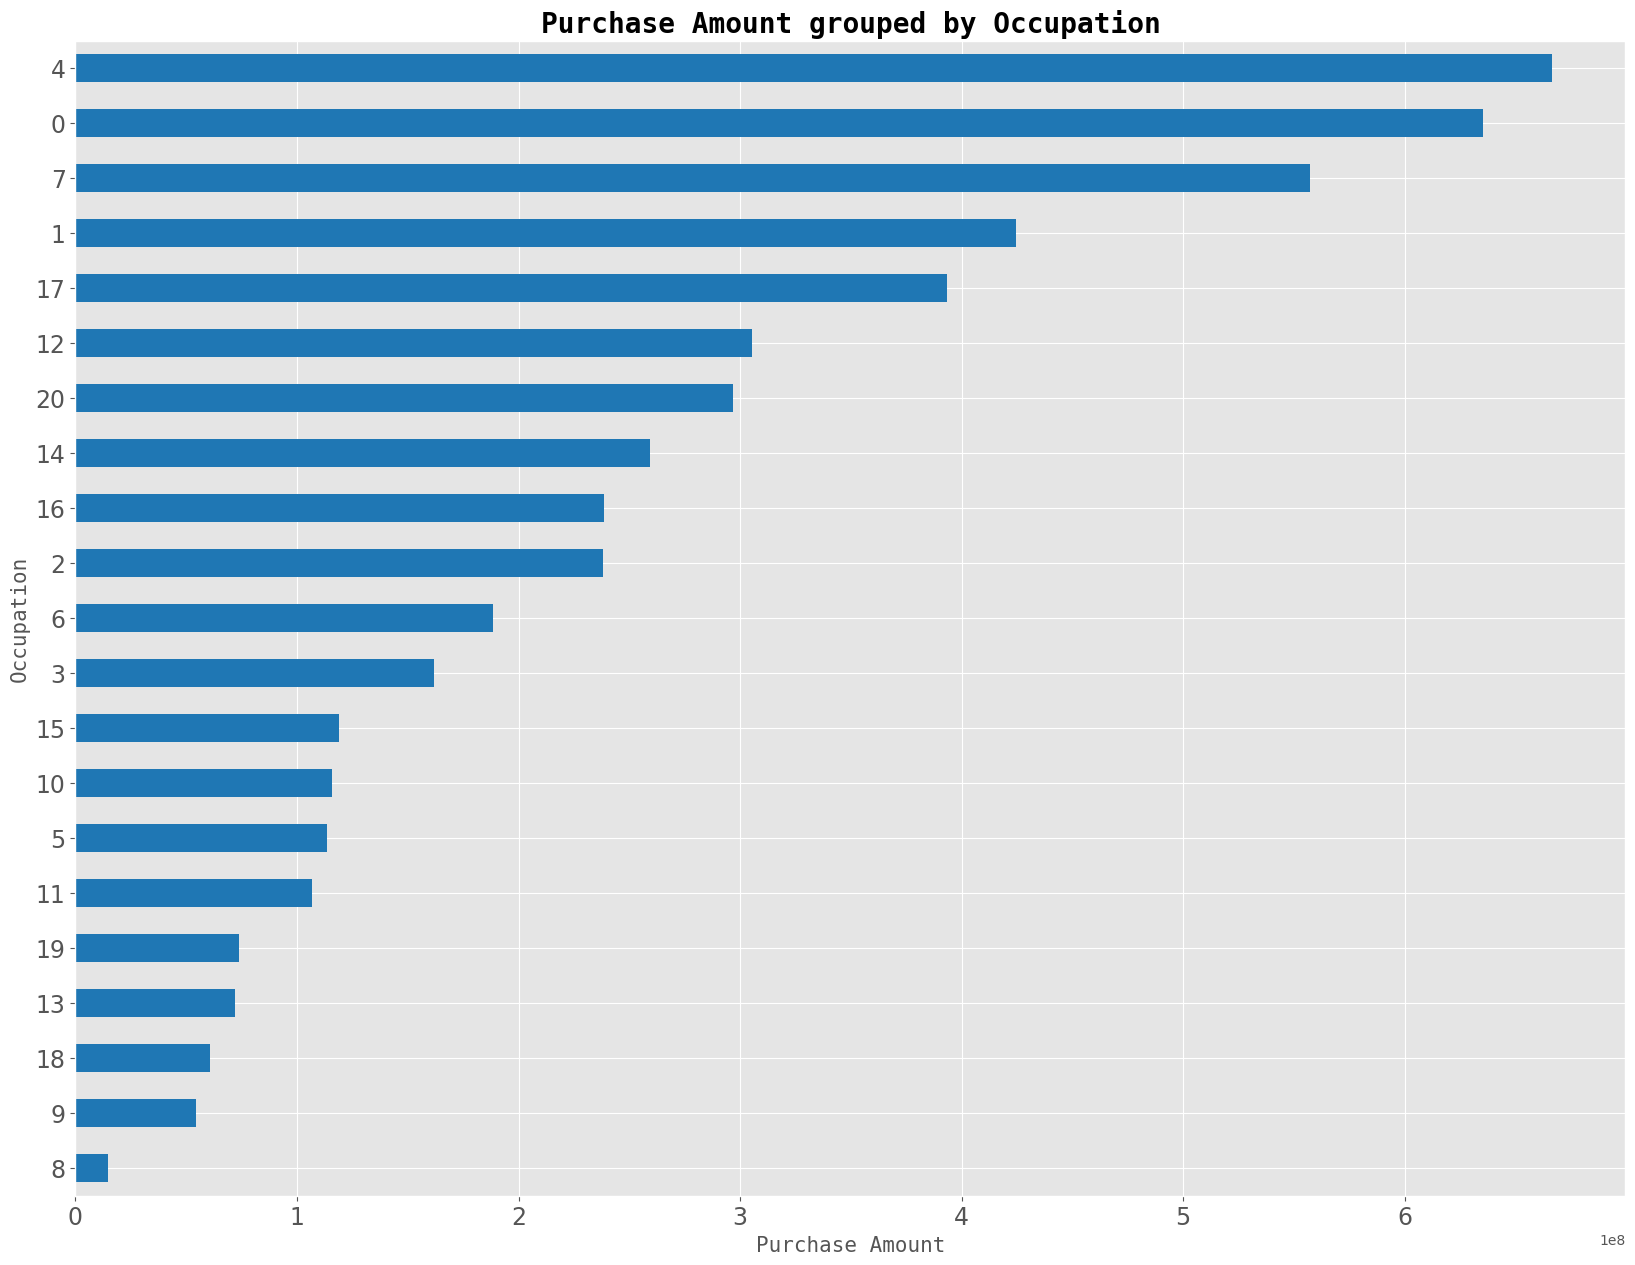

In [24]:
groupby=train.groupby('Occupation').sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(20, 15))
groupby.plot(kind='barh',color='#1f77b4')
plt.title('Purchase Amount grouped by Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Purchase Amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 17)
plt.style.use(('ggplot'))

The people having occupation as “4”, are the major contributor's to the purchase amount. The people who are having occupation under “8” are people who spend less. It can be inferred that the "4" is one of the high paying jobs. When we combine this column with the Age Column, the age group 18-25 working under Occupation 4 are the people who spend the most. These are the young people who have high paying jobs and have the liberty to spend more.

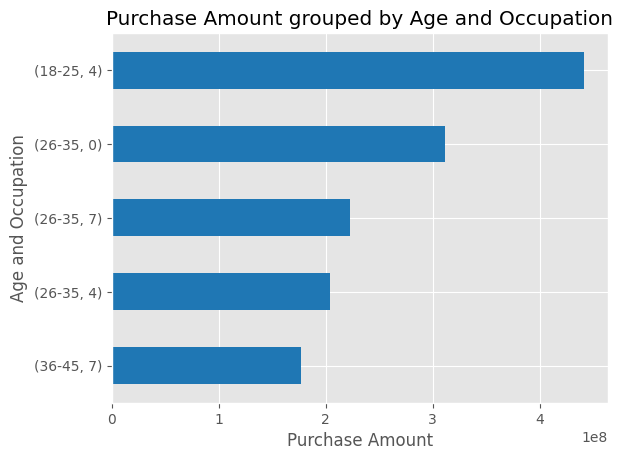

In [25]:
groupby=train.groupby(['Age','Occupation']).sum().sort_values("Purchase", ascending=True)['Purchase'].tail()
#plt.figure(figsize=(10, 25))
groupby.plot(kind='barh',color='#1f77b4')
plt.title('Purchase Amount grouped by Age and Occupation')
plt.xlabel('Purchase Amount')
plt.ylabel('Age and Occupation')
plt.style.use(('ggplot'))

##### Observe purchase amount based on person staying in the city for number of years.

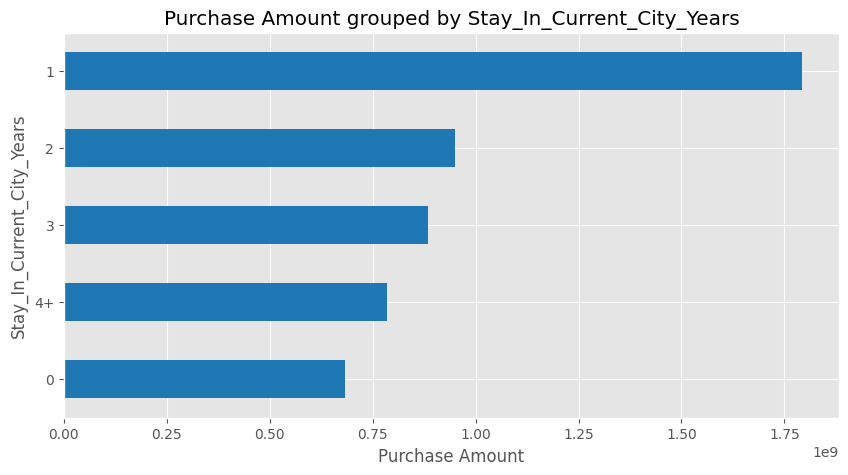

In [26]:
groupby=train.groupby(['Stay_In_Current_City_Years']).sum().sort_values("Purchase")['Purchase']
plt.figure(figsize=(10, 5))
groupby.plot(kind='barh',color='#1f77b4')
plt.title('Purchase Amount grouped by Stay_In_Current_City_Years')
plt.xlabel('Purchase Amount')
plt.ylabel('Stay_In_Current_City_Years')
plt.style.use(('ggplot'))

after analyzing this column we come to know the people who have spent 1 year in the city tend to spend the most. This is understandable as, people who have spent more than 4 years in the city are generally well settled and are less interested in buying new things as compared to the people new to the city, who tend to buy more.

#### the most bought products and its counts.

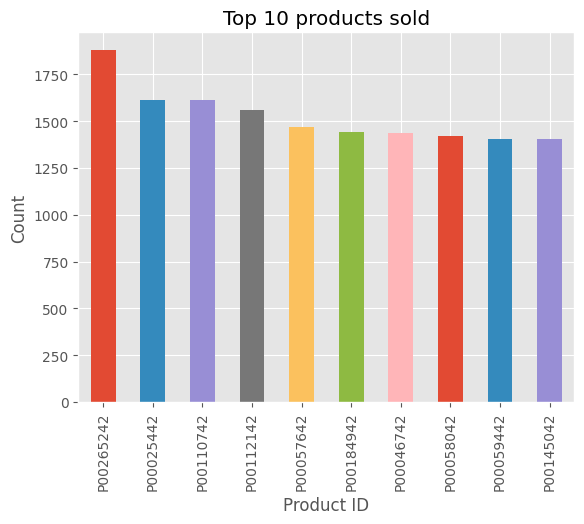

In [27]:
#top 10 poducts sold
train_prod_id = train["Product_ID"].value_counts(sort=True)[:10]
#plotting the top 10 products sold
train_prod_id.plot(kind='bar',color = sns.color_palette())
plt.title('Top 10 products sold')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.style.use(('ggplot'))

#### Observe most bought product based on city category.

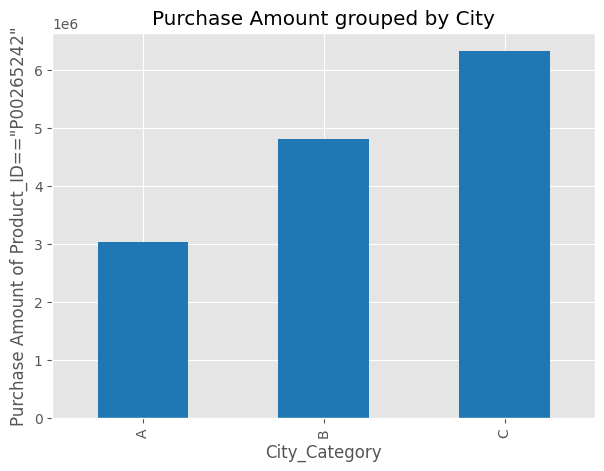

In [28]:
groupby=train.loc[train.Product_ID=='P00265242'].groupby('City_Category').sum()['Purchase']
plt.figure(figsize=(7, 5))
groupby.plot(kind='bar',color='#1f77b4')
plt.title('Purchase Amount grouped by City') 
plt.ylabel('Purchase Amount of Product_ID=="P00265242"')
plt.xlabel('City_Category')
plt.style.use(('ggplot'))

#### The users who have bought the maximum number of products.

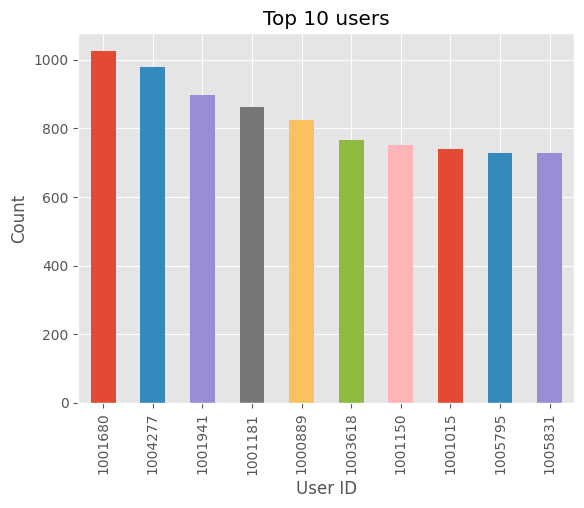

In [29]:
#top 10 users 
train_prod_id = train["User_ID"].value_counts(sort=True)[:10]
#plotting the top 10 users
train_prod_id.plot(kind='bar',color = sns.color_palette())
plt.title('Top 10 users')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.style.use(('ggplot'))

#### Number of products which the user "1001680" has bought them

In [30]:
train.loc[train.User_ID==1001680].Product_ID .count()

1026

#### Total number of users who shopped during black friday.

In [31]:
len(train.User_ID.unique())

5891

Now we did product-based analysis, the most brought product was the product with Product Id: P00265242. This product was bought more than 1750 times. Then we, examined in which city the product was purchased to our surprise, even though the city B is majorly responsible for the overall sales income, but when it comes to the above product, it majorly purchased in the city C. The user with the User ID: 1001680 was the person who bought the most number of products (1026 products)

### Data preparation

Before implemting the models to predict the target variable we implemted Lable encoding. This was done to convert the cateorical data into numerical data. Then we implemeted Standard Scalar to scale and to reduce the variance in the dataset to 1.

##### Merging of train and test

In [32]:
train['source'] = 'train'
test['source'] = 'test'

In [33]:
dataset = pd.concat([train, test])

##### Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [34]:
dataset['Age'] = dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [35]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

##### Dropping irrelevant features

In [36]:
dataset.drop('Product_Category_3', axis = 1, inplace = True)

In [37]:
dataset.drop('User_ID', axis = 1, inplace = True)

In [38]:
dataset.drop('Product_ID', axis = 1, inplace = True)

In [39]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,F,0-17,10,A,2,0,3,NaN,8370.0,train
1,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,F,0-17,10,A,2,0,12,NaN,1422.0,train
3,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,M,55,16,C,4,0,8,NaN,7969.0,train


##### Feature Encoding

In [40]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [41]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [42]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

##### Fixing null values in 'Product_Category_2'

In [43]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)

##### Convert 'Stay_In_Current_City_Years' into numeric data type

In [44]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('int')

##### Separating dataset into train and test

In [45]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [46]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

##### Separating train into X and Y

In [47]:
train = train.sample(n = 250000)

In [48]:
X = train.drop('Purchase', axis = 1)

In [49]:
Y = train['Purchase']

In [50]:
#X = train.drop('Purchase', axis = 1).head(250000)

In [51]:
#Y = train['Purchase'].head(250000)

##### Feature Selection

In [52]:
selector = ExtraTreesRegressor()

In [53]:
selector.fit(X, Y)

ExtraTreesRegressor()

In [54]:
feature_imp = selector.feature_importances_
feature_imp

array([0.00615841, 0.02637381, 0.06007577, 0.00852631, 0.03215622,
       0.00775937, 0.76844998, 0.09050013])

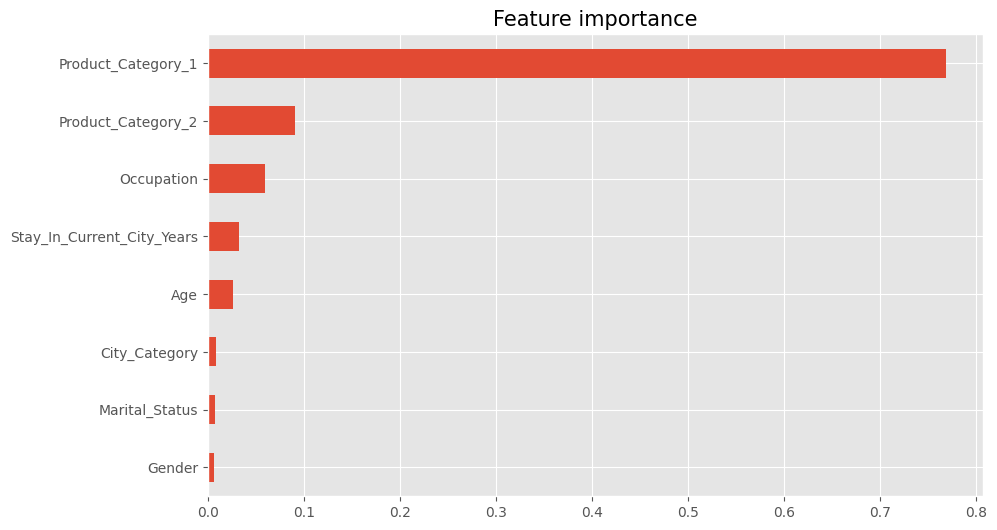

In [55]:
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(feature_imp, index=X.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')
plt.title('Feature importance',fontdict = {'fontsize' : 15})
plt.show()

In [56]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

##### Feature Scaling

In [57]:
scaler = StandardScaler()

In [58]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [59]:
X.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
203221,-0.365947,-0.933032,0.885588,0.660105,-0.136937
351286,1.112819,-1.239605,1.660766,-1.118981,-1.794181
509819,-0.365947,-0.319884,0.885588,-1.118981,-1.794181
364426,1.112819,-1.086318,0.885588,1.676725,-0.136937
223971,-1.105331,-0.626458,-0.664768,-1.118981,-1.794181


##### Creating a train test split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [61]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (200000, 5)
X_test shape: (50000, 5)
Y_train shape: (200000,)
Y_test shape: (50000,)


### Data Modelling

##### Linear Regression

In [62]:
lin_reg = LinearRegression()

In [63]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [64]:
Y_pred_lin_reg = lin_reg.predict(X_test)
Y_pred_lin_reg

array([ 8270.15752002,  8270.15752002,  7038.24972459, ...,
       11534.25350881,  8169.51616649,  6512.08465441])

##### KNN Regression

In [65]:
knn = KNeighborsRegressor()

In [66]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [67]:
Y_pred_knn = knn.predict(X_test)
Y_pred_knn

array([ 7164.8,  7164.8, 20547.4, ..., 15618.6,  6818.6,  4526.2])

##### Decision Tree Regression

In [68]:
dec_tree = DecisionTreeRegressor()

In [69]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [70]:
Y_pred_dec = dec_tree.predict(X_test)
Y_pred_dec

array([ 7319.51815182,  7319.51815182, 21176.        , ...,
       12824.62204724,  7317.91666667,  4540.33333333])

##### Random Forest Regressor

In [71]:
ran_for = RandomForestRegressor()

In [72]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor()

In [73]:
Y_pred_ran_for = ran_for.predict(X_test)

### Model Evaluation

In [74]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4678.130500990724
R2 score: 0.12606884969299137


In [75]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print("R2 score:", r2_score(Y_test, Y_pred_knn))

KNN regression: 
RMSE: 3340.016387400996
R2 score: 0.5545184219466386


In [76]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print("R2 score:", r2_score(Y_test, Y_pred_dec))

Decision tree regression: 
RMSE: 3138.2903066908643
R2 score: 0.6067046742191434


In [77]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 3066.9371992766405
R2 score: 0.6243855248161396


### Conclusion

In this project, we tried to build a model using various algorithms such as Linear regression, KNN regression, Decision tree regression and Random forest regression to get the best possible prediction.

for this problem Random forest gives us the best rmse value and r2 score 